In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from scipy import stats
import folium as folium
from IPython.display import display
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx





### Lectura del archivo Tenesse.json

In [2]:
df= pd.read_json(r"C:\Users\jessi\Desktop\Horizon_Project\Tenesse\Tennessee.json",lines=True)

In [3]:
df.head()

,user_id,name,rating,text,resp,gmap_id
0,1.145221e+20,Jessica,5,Where has this been all my life!!! SMOOTHIE KI...,None,0x886466a4208f8ced:0x4e8c845aebe361fe
1,1.167070e+20,nancy lewis,4,Very nice guy that works there.,None,0x886466a4208f8ced:0x4e8c845aebe361fe
2,1.154777e+20,Teus Kappen,4,Very friendly staff! Smoothies are pretty good.,None,0x886466a4208f8ced:0x4e8c845aebe361fe
3,1.113632e+20,patrick binkley,3,None,None,0x886466a4208f8ced:0x4e8c845aebe361fe
4,1.006820e+20,Sachin Nuguru,5,None,None,0x886466a4208f8ced:0x4e8c845aebe361fe


### Lectura del archivo "df_gastronomico_ciudades.json "

In [4]:
df2=pd.read_json(r"C:\Users\jessi\Desktop\Horizon_Project\Washington\df_gastronomico_ciudades.json",lines=True)

In [5]:
df2.head()

,nombre_local,direccion,ciudad,codigo_postal_cod_ciudad,codigo_ciudad,codigo_postal,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,MISC
0,Creole Orleans Catering & Food Truck,2841 Greenbriar Pkwy SW N317,Atlanta,GA 30331,GA,30331,0x88f503d71429c049:0xef40e07a5479b1c2,33.689032,-84.495097,"[Creole restaurant, Caribbean restaurant, Cate...",4.7,31,None,"{'Service options': ['Delivery', 'Takeout', 'D..."
1,Biswas Grocery and Cafe,2853 Buford Hwy NE,Atlanta,GA 30329,GA,30329,0x88f507f3e1cde31d:0x1bcd2bb2f0555399,33.831454,-84.341647,"[Organic food store, Convenience store, Phone ...",4.7,25,None,"{'Service options': ['Delivery', 'In-store sho..."
2,Noodle Cafe,233 Peachtree St # B70,Atlanta,GA 30303,GA,30303,0x88f5047831dfc86d:0x985e3a6645f5ca4f,33.760404,-84.386319,"[Thai restaurant, Restaurant]",4.2,35,None,"{'Service options': ['Takeout', 'Dine-in', 'De..."
3,Creole Orleans Catering & Food Truck,2841 Greenbriar Pkwy SW N317,Atlanta,GA 30331,GA,30331,0x88f503d71429c049:0xef40e07a5479b1c2,33.689032,-84.495097,"[Creole restaurant, Caribbean restaurant, Cate...",4.7,31,None,"{'Service options': ['Delivery', 'Takeout', 'D..."
4,Biswas Grocery and Cafe,2853 Buford Hwy NE,Atlanta,GA 30329,GA,30329,0x88f507f3e1cde31d:0x1bcd2bb2f0555399,33.831454,-84.341647,"[Organic food store, Convenience store, Phone ...",4.7,25,None,"{'Service options': ['Delivery', 'In-store sho..."


### Informacion General

In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12794 entries, 0 to 12793
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  12794 non-null  float64
 1   name     12794 non-null  object 
 2   rating   12794 non-null  int64  
 3   text     7651 non-null   object 
 4   resp     1748 non-null   object 
 5   gmap_id  12794 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 599.8+ KB
None


In [7]:
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18037 entries, 0 to 18036
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nombre_local              18037 non-null  object 
 1   direccion                 18037 non-null  object 
 2   ciudad                    18037 non-null  object 
 3   codigo_postal_cod_ciudad  18037 non-null  object 
 4   codigo_ciudad             18037 non-null  object 
 5   codigo_postal             18037 non-null  object 
 6   gmap_id                   18037 non-null  object 
 7   latitude                  18037 non-null  float64
 8   longitude                 18037 non-null  float64
 9   category                  18037 non-null  object 
 10  avg_rating                18037 non-null  float64
 11  num_of_reviews            18037 non-null  int64  
 12  price                     8690 non-null   object 
 13  MISC                      17614 non-null  object 
dtypes: flo

### Descripción de los dataframe

In [8]:
df['rating'].describe()


count    12794.000000
mean         4.240660
std          1.146503
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [9]:
df2.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,18037.000000,18037.000000,18037.000000,18037.000000
mean,38.290007,-92.404179,4.137573,70.622276
std,4.948144,18.621202,0.575608,143.090909
min,25.993710,-122.805295,1.000000,1.000000
25%,34.055071,-118.186637,3.900000,17.000000
50%,39.943207,-86.808270,4.200000,38.000000
75%,40.831310,-74.145373,4.500000,78.000000
max,47.682747,-71.145040,5.000000,5321.000000


### Análisis de Datos Nulos

In [10]:
print(df.isnull().sum())


user_id        0
name           0
rating         0
text        5143
resp       11046
gmap_id        0
dtype: int64


In [11]:
print(df2.isnull().sum())


nombre_local                   0
direccion                      0
ciudad                         0
codigo_postal_cod_ciudad       0
codigo_ciudad                  0
codigo_postal                  0
gmap_id                        0
latitude                       0
longitude                      0
category                       0
avg_rating                     0
num_of_reviews                 0
price                       9347
MISC                         423
dtype: int64


### Outliers

Outliers en la columna 'rating' usando IQR:
5        1
8        1
12       1
20       1
23       1
        ..
12751    1
12759    1
12775    2
12778    1
12780    1
Name: rating, Length: 1253, dtype: int64
Outliers en la columna 'rating' usando Z-score:
Series([], Name: rating, dtype: int64)


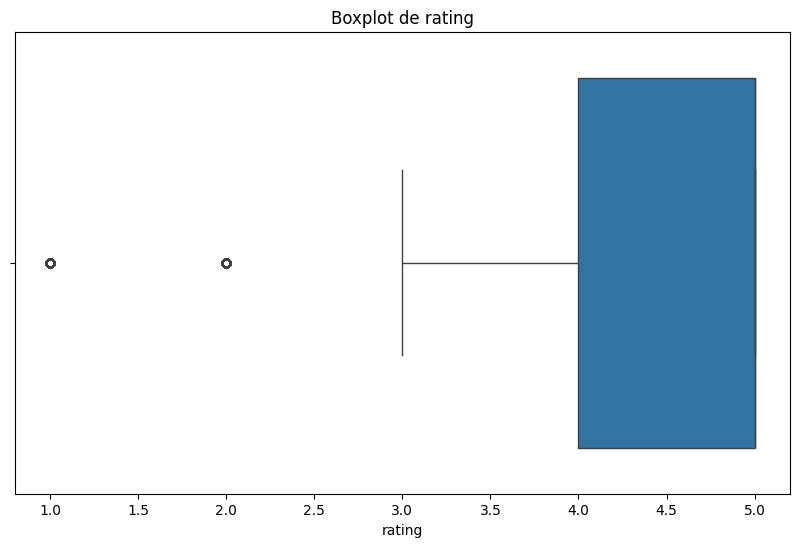

In [12]:
rating = df['rating']

# Calcular el IQR para la columna 'rating'
Q1 = rating.quantile(0.25)
Q3 = rating.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers usando IQR
outliers_iqr = rating[(rating < (Q1 - 1.5 * IQR)) | (rating > (Q3 + 1.5 * IQR))]
print("Outliers en la columna 'rating' usando IQR:")
print(outliers_iqr)

# Calcular Z-score para la columna 'rating'
z_scores = stats.zscore(rating)
abs_z_scores = abs(z_scores)

# Identificar outliers con Z-score mayor que 3
outliers_z = rating[abs_z_scores > 3]
print("Outliers en la columna 'rating' usando Z-score:")
print(outliers_z)

# Graficar el boxplot para 'rating'
plt.figure(figsize=(10, 6))
sns.boxplot(x=rating)
plt.title('Boxplot de rating')
plt.show()


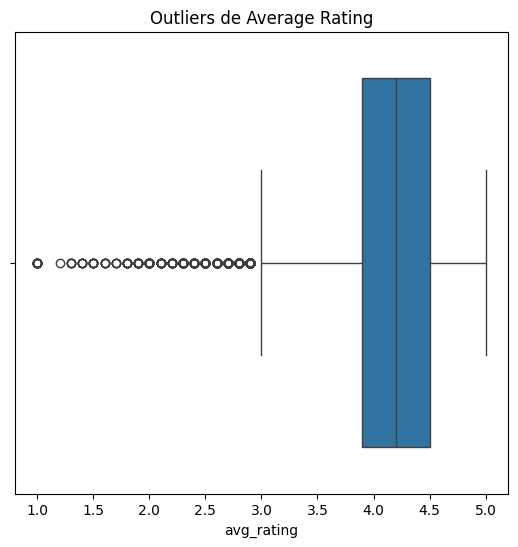

In [13]:


columns_to_check = ['avg_rating']

Q1 = df2[columns_to_check].quantile(0.25)
Q3 = df2[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df2[(df2[columns_to_check] < (Q1 - 1.5 * IQR)) | (df2[columns_to_check] > (Q3 + 1.5 * IQR))]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df2['avg_rating'])
plt.title('Outliers de Average Rating')



plt.show()



Outliers en la columna 'num_of_reviews' usando IQR:
124      798
206      178
217      496
224      214
229      768
        ... 
18019    238
18024    244
18027    292
18029    178
18031    238
Name: num_of_reviews, Length: 1371, dtype: int64
Outliers en la columna 'num_of_reviews' usando Z-score:
124       798
229       768
233      1018
237      3128
238      1373
         ... 
17884     798
17890    1108
17892    1208
17893    1351
17901     624
Name: num_of_reviews, Length: 171, dtype: int64


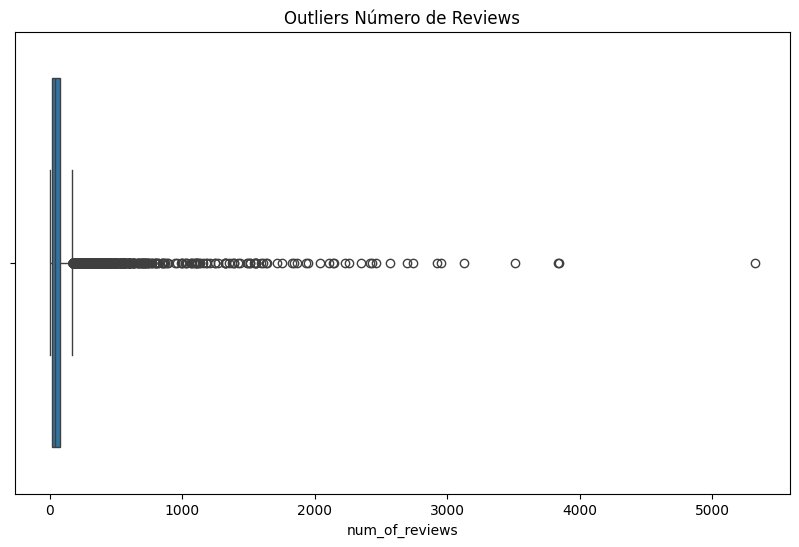

In [14]:

num_of_reviews = df2['num_of_reviews']

Q1 = num_of_reviews.quantile(0.25)
Q3 = num_of_reviews.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = num_of_reviews[(num_of_reviews < (Q1 - 1.5 * IQR)) | (num_of_reviews > (Q3 + 1.5 * IQR))]
print("Outliers en la columna 'num_of_reviews' usando IQR:")
print(outliers_iqr)

z_scores = stats.zscore(num_of_reviews)
abs_z_scores = abs(z_scores)

outliers_z = num_of_reviews[abs_z_scores > 3]
print("Outliers en la columna 'num_of_reviews' usando Z-score:")
print(outliers_z)

plt.figure(figsize=(10, 6))
sns.boxplot(x=num_of_reviews)
plt.title('Outliers Número de Reviews')
plt.show()


### Histogramas de distribución

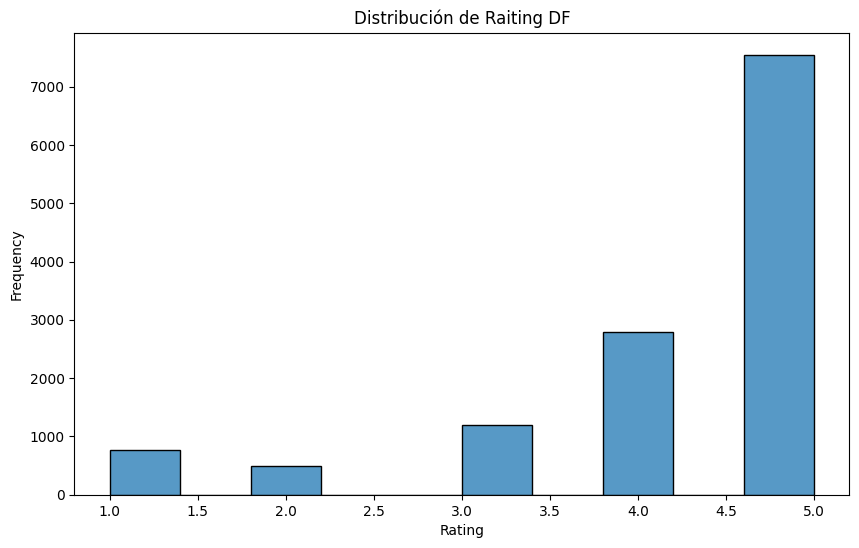

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['rating'], bins=10)
plt.title('Distribución de Raiting DF')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


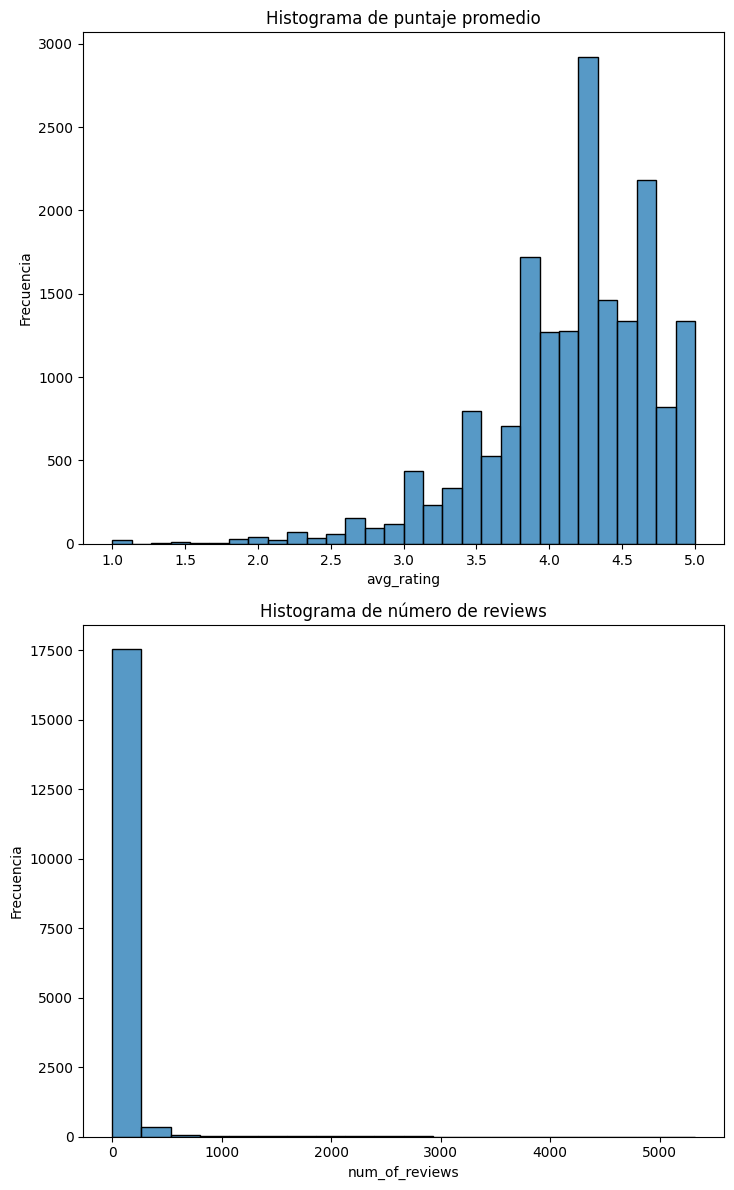

In [16]:
avg_rating = df2['avg_rating']
num_of_reviews = df2['num_of_reviews']

plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.histplot(avg_rating, bins=30, kde=False)
plt.title('Histograma de puntaje promedio')
plt.xlabel('avg_rating')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
sns.histplot(num_of_reviews, bins=20, kde=False)
plt.title('Histograma de número de reviews')
plt.xlabel('num_of_reviews')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Análisis de sentimientos 

In [17]:
df['text'] = df['text'].fillna('')


In [18]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['review_sentiment'] = df['text'].apply(get_sentiment)

print(df[['text', 'review_sentiment']].head())


                                                text  review_sentiment
0  Where has this been all my life!!! SMOOTHIE KI...          0.375000
1                    Very nice guy that works there.          0.780000
2    Very friendly staff! Smoothies are pretty good.          0.519792
3                                                             0.000000
4                                                             0.000000


Text(0, 0.5, 'Frecuencia')

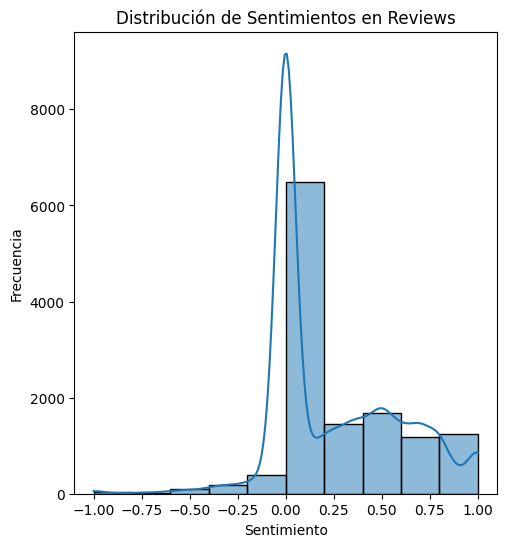

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['review_sentiment'], bins=10, kde=True)
plt.title('Distribución de Sentimientos en Reviews')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')


### Unión de datasets

In [20]:
merged_df = pd.merge(df, df2, on='gmap_id', how='inner')


In [21]:
merged_df

,user_id,name,rating,text,resp,gmap_id,review_sentiment,nombre_local,direccion,ciudad,codigo_postal_cod_ciudad,codigo_ciudad,codigo_postal,latitude,longitude,category,avg_rating,num_of_reviews,price,MISC
0,1.145221e+20,Jessica,5,Where has this been all my life!!! SMOOTHIE KI...,None,0x886466a4208f8ced:0x4e8c845aebe361fe,0.375000,Smoothie King,2700 Children's Way,Nashville,TN 37212,TN,37212,36.139748,-86.808900,"[Juice shop, Fast food restaurant, Health food...",4.0,8,$$,"{'Service options': ['Takeout', 'Delivery'], '..."
1,1.145221e+20,Jessica,5,Where has this been all my life!!! SMOOTHIE KI...,None,0x886466a4208f8ced:0x4e8c845aebe361fe,0.375000,Smoothie King,2700 Children's Way,Nashville,TN 37212,TN,37212,36.139748,-86.808900,"[Juice shop, Fast food restaurant, Health food...",4.0,8,$$,"{'Service options': ['Takeout', 'Delivery'], '..."
2,1.167070e+20,nancy lewis,4,Very nice guy that works there.,None,0x886466a4208f8ced:0x4e8c845aebe361fe,0.780000,Smoothie King,2700 Children's Way,Nashville,TN 37212,TN,37212,36.139748,-86.808900,"[Juice shop, Fast food restaurant, Health food...",4.0,8,$$,"{'Service options': ['Takeout', 'Delivery'], '..."
3,1.167070e+20,nancy lewis,4,Very nice guy that works there.,None,0x886466a4208f8ced:0x4e8c845aebe361fe,0.780000,Smoothie King,2700 Children's Way,Nashville,TN 37212,TN,37212,36.139748,-86.808900,"[Juice shop, Fast food restaurant, Health food...",4.0,8,$$,"{'Service options': ['Takeout', 'Delivery'], '..."
4,1.154777e+20,Teus Kappen,4,Very friendly staff! Smoothies are pretty good.,None,0x886466a4208f8ced:0x4e8c845aebe361fe,0.519792,Smoothie King,2700 Children's Way,Nashville,TN 37212,TN,37212,36.139748,-86.808900,"[Juice shop, Fast food restaurant, Health food...",4.0,8,$$,"{'Service options': ['Takeout', 'Delivery'], '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12819,1.080370e+20,Erick Avendano,5,,None,0x88646e4901d5e847:0x3623261faeaaf9d7,0.000000,Taqueria Lindo Michoacan,3912 Apache Trail,Antioch,TN 37013,TN,37013,36.068728,-86.693342,"[Mexican restaurant, Latin American restaurant]",4.1,88,None,"{'Service options': ['Delivery', 'Takeout'], '..."
12820,1.167654e+20,Minerva Arellano,5,,None,0x88646e4901d5e847:0x3623261faeaaf9d7,0.000000,Taqueria Lindo Michoacan,3912 Apache Trail,Antioch,TN 37013,TN,37013,36.068728,-86.693342,"[Mexican restaurant, Latin American restaurant]",4.1,88,None,"{'Service options': ['Delivery', 'Takeout'], '..."
12821,1.100684e+20,mireya faine,5,,None,0x88646e4901d5e847:0x3623261faeaaf9d7,0.000000,Taqueria Lindo Michoacan,3912 Apache Trail,Antioch,TN 37013,TN,37013,36.068728,-86.693342,"[Mexican restaurant, Latin American restaurant]",4.1,88,None,"{'Service options': ['Delivery', 'Takeout'], '..."
12822,1.030430e+20,Marco Blancas,4,,None,0x88646e4901d5e847:0x3623261faeaaf9d7,0.000000,Taqueria Lindo Michoacan,3912 Apache Trail,Antioch,TN 37013,TN,37013,36.068728,-86.693342,"[Mexican restaurant, Latin American restaurant]",4.1,88,None,"{'Service options': ['Delivery', 'Takeout'], '..."


### Gráfico de los 20 restaurants con más reviews

In [22]:
local_comment_counts = merged_df['nombre_local'].value_counts().reset_index()
local_comment_counts.columns = ['nombre_local', 'num_of_reviews']

# Seleccionar los 20 locales con más comentarios
top_locals = local_comment_counts.head(20)

# Mostrar el ranking
print(top_locals)

                                         nombre_local  num_of_reviews
0                    Cracker Barrel Old Country Store            1721
1                 Red Robin Gourmet Burgers and Brews             863
2                                Sitar Indian Cuisine             637
3                                              Arby's             606
4                                              Subway             346
5                                       Fat Mo's No 1             345
6                                 Corner Pub Downtown             267
7                              Crow's Nest Restaurant             224
8                                  Sportsman's Grille             210
9                                     The 404 Kitchen             191
10                            South Street Restaurant             182
11  Sulav / Nashville International Food Market & ...             177
12                           Nashville Venezuela Food             155
13                  

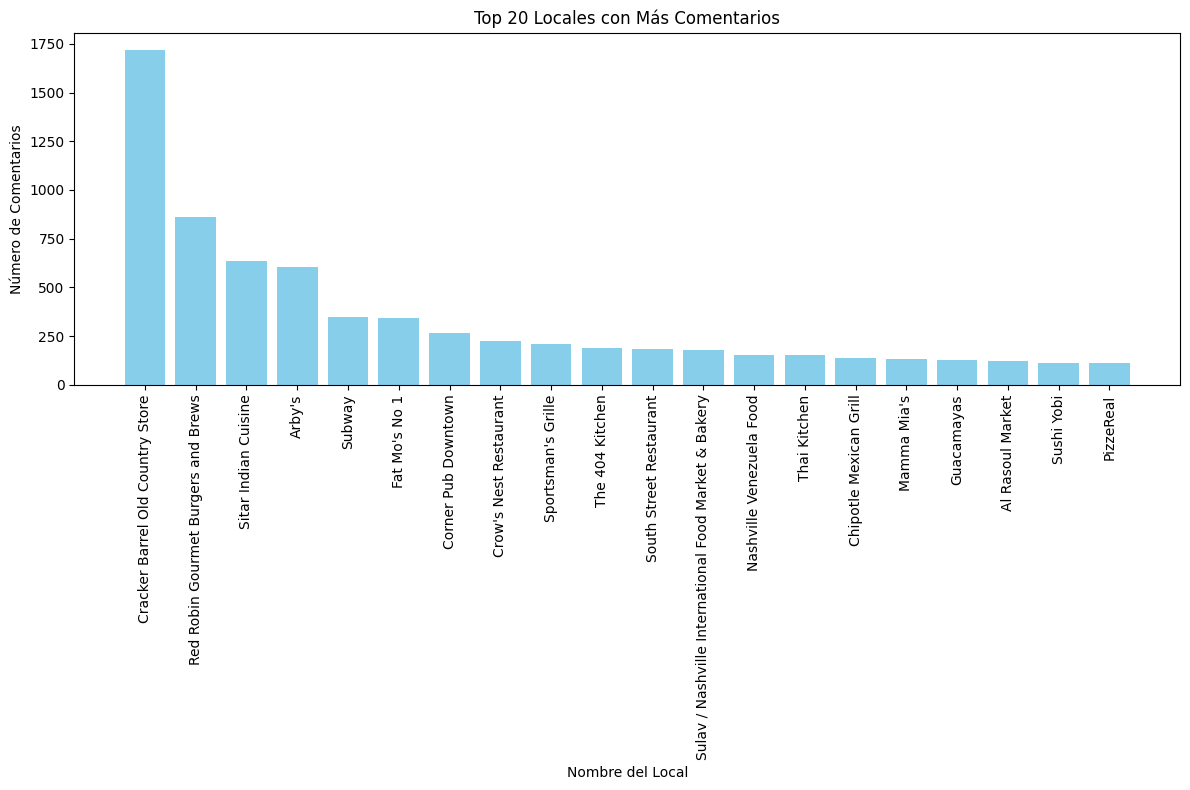

In [23]:
plt.figure(figsize=(12, 8))
plt.bar(top_locals['nombre_local'], top_locals['num_of_reviews'], color='skyblue')

plt.xlabel('Nombre del Local')
plt.ylabel('Número de Comentarios')
plt.title('Top 20 Locales con Más Comentarios')
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()

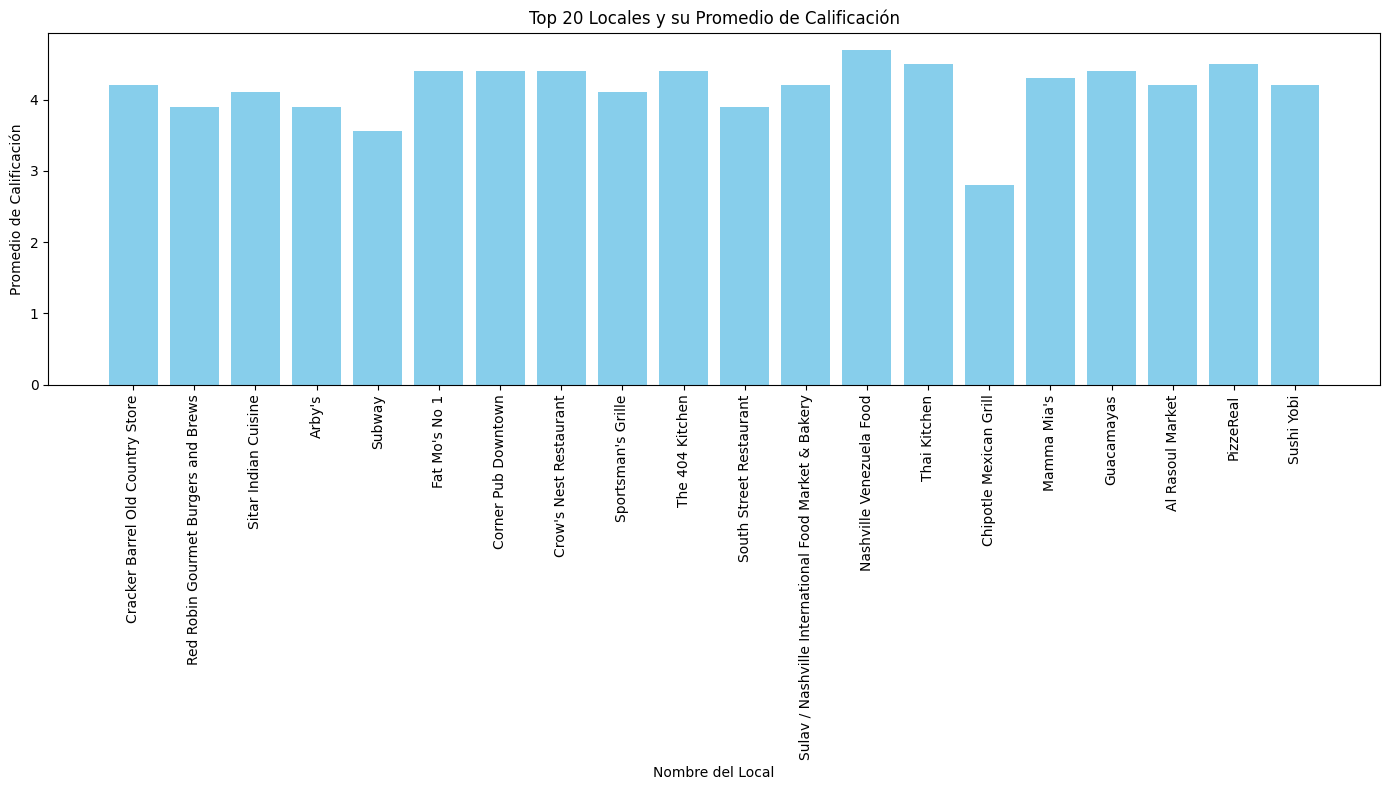

In [24]:
local_comment_counts = merged_df.groupby('nombre_local').agg(
    num_of_reviews=('nombre_local', 'count'),
    avg_rating=('avg_rating', 'mean')
).reset_index()

top_locals = local_comment_counts.sort_values(by='num_of_reviews', ascending=False).head(20)

plt.figure(figsize=(14, 8))
plt.bar(top_locals['nombre_local'], top_locals['avg_rating'], color='skyblue')

plt.xlabel('Nombre del Local')
plt.ylabel('Promedio de Calificación')
plt.title('Top 20 Locales y su Promedio de Calificación')
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()


In [25]:
merged_df.to_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Tennesse.csv", index=False)
